<a href="https://colab.research.google.com/github/rahultj333/ML-Regression-Retails-sales-Prediction/blob/main/Individual_ML_Regression_Retails_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>



##### **Project Type**    -  Regression
##### **Contribution**    - Team
##### **Team Member 1 - Saniya Bubere**
##### **Team Member 2 - Rahul Jadhav**
##### **Team Member 3 - Rupali Dawkore**


## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann Managers are tasked with predicting their daily sales for upto six weeks in advance** 

the task is to forecast the sales column for the test set

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot
import pylab as py
import statsmodels.api as sm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import numpy as np
import pylab as py
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

### Dataset Loading

In [2]:
# Load Dataset

#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading Rossmann Data as df1
df1=pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')

In [4]:
#loading Store Data as df2
df2=pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

### Dataset First View

In [5]:
# Dataset First Look

#1st 5 rows of df1
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#1st 5 rows of df2
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
#Statistical Info
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#Statistical Info
df2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count

#datatype of attributes of Rossman Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#datatype of attributes of Store Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Dataset Information

In [11]:
# Dataset Info

#check unique value in Rossman dataset
count=df1[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']].nunique()
print("Unique value count:\n",count)

Unique value count:
 Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [12]:
#check unique value in Store dataset
count2=df2[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].nunique()
print("Unique Values Count Fro Datase 2:\n",count2)

Unique Values Count Fro Datase 2:
 Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


In [13]:
#Checking Null Values in Rossman Dataset
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
#checking null value in Store Dataset
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count

# Checking if any Duplicate values are present in the Rossman Dataset
df1.duplicated().sum()

0

In [16]:
# Checking if any Duplicate values are present in the Store Dataset
df2.duplicated().sum()

0

#### Missing Values/Null Values

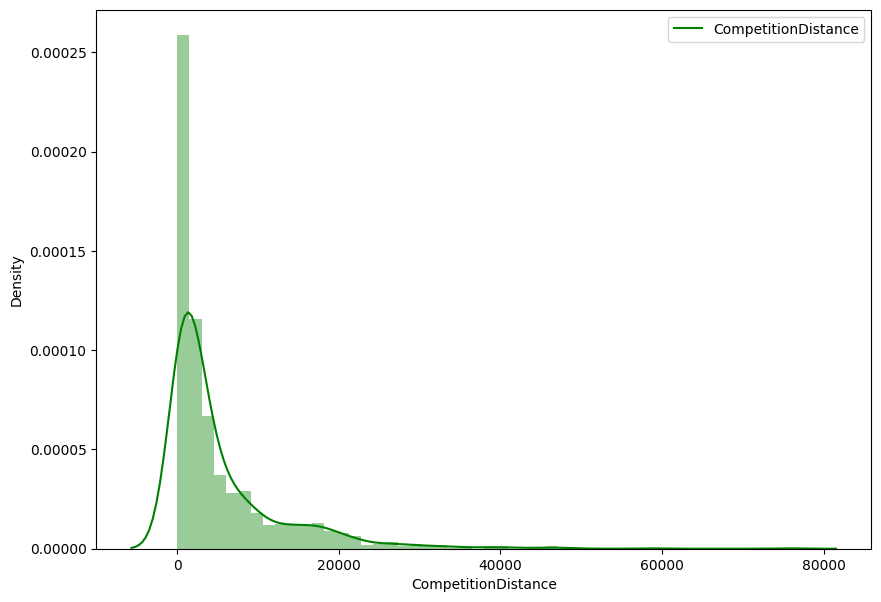

In [17]:
# Missing Values/Null Values Count

plt.figure(figsize=(10,7))
sns.distplot(df2['CompetitionDistance'],color = 'green')
plt.legend(['CompetitionDistance'])
plt.show()

In [18]:
#checking mean 
Checking_Mean=df2['CompetitionDistance'].mean()
Checking_Mean 

5404.901079136691

In [19]:
#checking median
Checking_Median=df2['CompetitionDistance'].median()
Checking_Median

2325.0

In [20]:
#checking mode
Checking_Mode=df2['CompetitionDistance'].mode()
Checking_Mode

0    250.0
Name: CompetitionDistance, dtype: float64

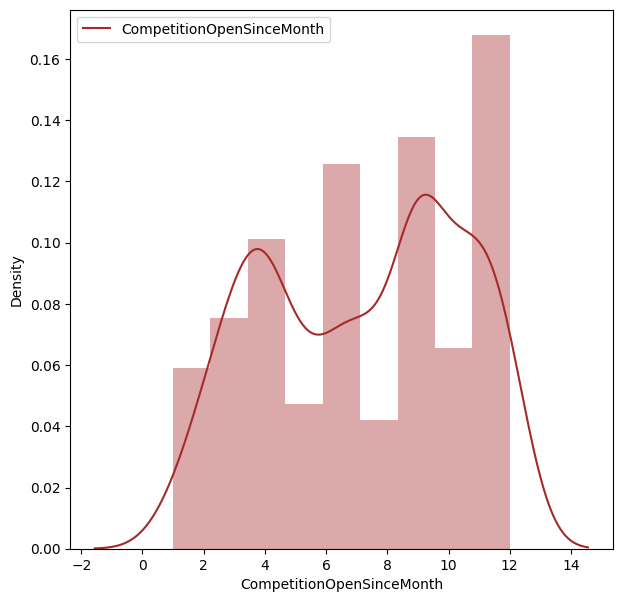

In [21]:
# checking CompetitionOpenSinceMonth distributuion
plt.figure(figsize=(7,7))
sns.distplot(df2['CompetitionOpenSinceMonth'],color = 'brown')
plt.legend(['CompetitionOpenSinceMonth'])
plt.show()

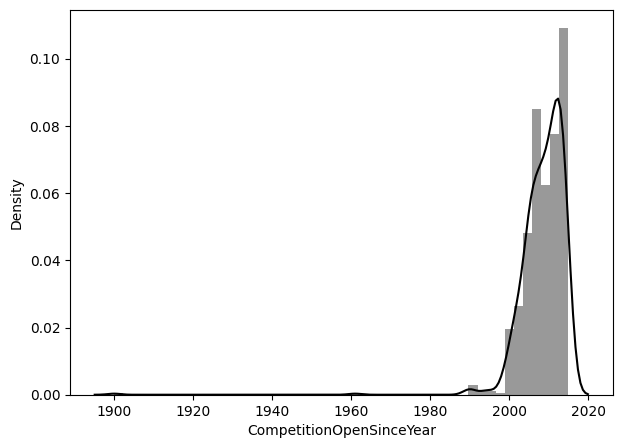

In [22]:
# checking distribution for CompetitionOpenSinceYear
plt.figure(figsize=(7,5))
sns.distplot(df2['CompetitionOpenSinceYear'],color='black')
plt.show()

In [23]:
#Checking Means
mean_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mean()
mean_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       7.224704
CompetitionOpenSinceYear     2008.668857
dtype: float64

In [24]:
#Checking Median
median_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].median()
median_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       8.0
CompetitionOpenSinceYear     2010.0
dtype: float64

In [25]:
#Checking Mode
Mode_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mode()
Mode_CompetitionOpenSinceMonth_Year

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,9.0,2013.0


In [26]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# Write your code to make your dataset analysis ready.

#Filling Nan Values With Median 
df2['CompetitionDistance'].fillna(Checking_Median,inplace=True)
#Checking that Nan Value is Replaced or Not
df2['CompetitionDistance'].isnull().value_counts()

False    1115
Name: CompetitionDistance, dtype: int64

In [28]:
#Replacing the Null values with suitable value
df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [29]:
#Replacing the Null Values with suitable value
df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [30]:
## Replacing the Null values with suitable value
df2[['Promo2SinceWeek','Promo2SinceYear']]=df2[['Promo2SinceWeek','Promo2SinceYear']].replace(np.nan,0)

In [31]:
#As PromoInterval is Object Type so Replacing its Null value with suitable Vale
df2['PromoInterval']=df2['PromoInterval'].replace(np.nan,"0")

In [32]:
#merging both dataset
df=df1.merge(df2)

In [33]:
#checking merge df
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***2. Understanding Your Variables***

In [34]:
print(df.Store.min())
print(df.Store.max())

1
1115


In [35]:
print(df.DayOfWeek.min())
print(df.DayOfWeek.max())

1
7


In [36]:
print(df.Date.min())
print(df.Date.max())

2013-01-01
2015-07-31


In [37]:
print(df.Sales.min())
print(df.Sales.max())

0
41551


In [38]:
print(df.Customers.min())
print(df.Customers.max())

0
7388


In [39]:
print(df.Open.min())
print(df.Open.max())

0
1


In [40]:
print(df.Promo.min())
print(df.Promo.max())

0
1


In [41]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [42]:
df.SchoolHoliday.unique()

array([1, 0])

In [43]:
#sorting StoreType values
df.sort_values(by=['StoreType'],inplace=True,ascending = True)

In [44]:
df.StoreType.unique()

array(['a', 'b', 'c', 'd'], dtype=object)

In [45]:
#sorting Assortment values
df.sort_values(by=['Assortment'],inplace=True,ascending=True)

In [46]:
df.Assortment.unique()

array(['a', 'b', 'c'], dtype=object)

In [47]:
df.StateHoliday.unique()

array(['0', 'b', 0, 'a', 'c'], dtype=object)

In [48]:
df["StateHoliday"].replace({"a": 1, "b": 1,"c":1}, inplace=True)
#replacing
df['StateHoliday']=df['StateHoliday'].replace(['0'],0)

In [49]:
print(df.CompetitionDistance.min())
print(df.CompetitionDistance.max())

20.0
75860.0


In [50]:
print(df.CompetitionOpenSinceMonth.min())
print(df.CompetitionOpenSinceMonth.max())

1.0
12.0


In [51]:
print(df.CompetitionOpenSinceYear.min())
print(df.CompetitionOpenSinceYear.max())

1900.0
2015.0


In [52]:
df.Promo2.unique()

array([0, 1])

In [53]:
print(df.Promo2SinceWeek.min())
print(df.Promo2SinceWeek.max())

0.0
50.0


In [54]:
df.Promo2SinceYear.unique()

array([   0., 2013., 2011., 2014., 2015., 2010., 2012., 2009.])

In [55]:
df.PromoInterval.unique()

array(['0', 'Mar,Jun,Sept,Dec', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov'],
      dtype=object)

In [56]:
#importing Datetime
from datetime import datetime

In [57]:
# code for changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [58]:
print(df['Date'].min(),'Starting Date')
print(df['Date'].max(),'Ending Date')

2013-01-01 00:00:00 Starting Date
2015-07-31 00:00:00 Ending Date


In [59]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 508604 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        10172

# **Univariant**

 **Distribution of diffrent StoreType**

In [60]:
sns.countplot(df['StoreType'])

ValueError: ignored

##### 1. Why did you pick the specific chart?

As Bar plots are commonly used to compare the values of different categories of data

##### 2. What is/are the insight(s) found from the chart?

No. of Store type 'a' has highest count followed by by type 'd' ,'c' & 'b'
 type 'b' store have lowest count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can compare the profitabily in percentage with the investment as well as with respect to store count. as much as profit more we can prefer to that types of stores.

**Distribution of Assortment Type and Average sales**

In [119]:
sns.countplot(df['Assortment'])

ValueError: ignored

##### 1. Why did you pick the specific chart?

As Bar plots are commonly used to compare the values of different categories of data

##### 2. What is/are the insight(s) found from the chart?

 a = basic, b = extra, c = extended
 We can Say that Type a i.e Basic have Highest count with respect to extra & extended
 
Distribution of Assortment Type 'a' has highest count and Distribution of Assortment Type 'b' has lowet count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Depending upon the demand and performance of assort type we can take decisions And We can say that Assortment Type 'a' that is Basic things have more count the extra and extented so people prefer basic more then other assortments

# **Open And Close Relation on the basis of Weeks**

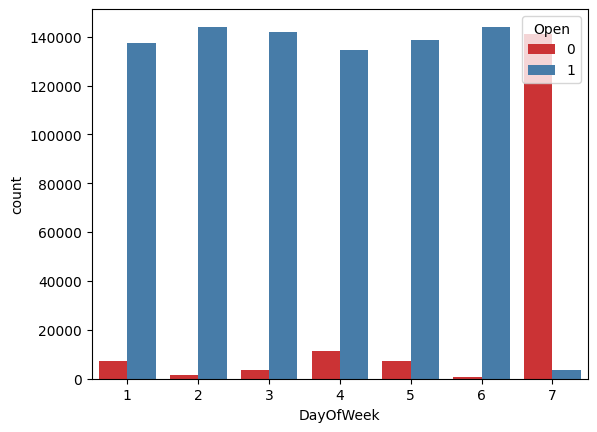

In [120]:
#Open_DayOfWeek
sns.countplot( x='DayOfWeek', data=df, hue="Open", palette="Set1");

##### 1. Why did you pick the specific chart?

We Use a side by side bar graph to enable comparisons of individual values.
#####Almost all the stores are closed at the weekend 

<Axes: ylabel='count'>

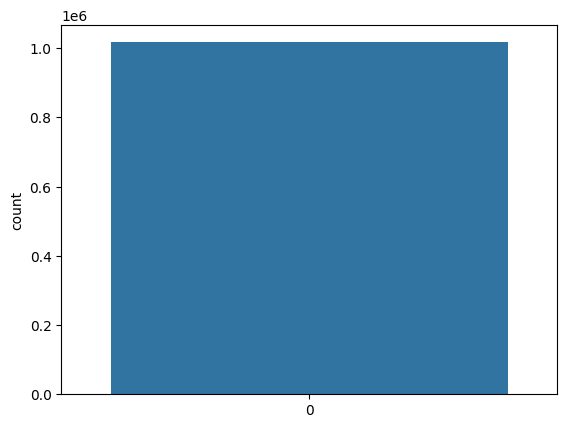

In [121]:
#count of CompetitionOpenSinceMonth
sns.countplot(df['CompetitionOpenSinceMonth'])

Use:Bar-Chart present data in a visual form so that the reader may readily recognize patterns

Insight-As in month of September Most Competition Opened

In [122]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2','PromoInterval']

In [123]:
# Value count for 0 and 1
df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

<Axes: ylabel='count'>

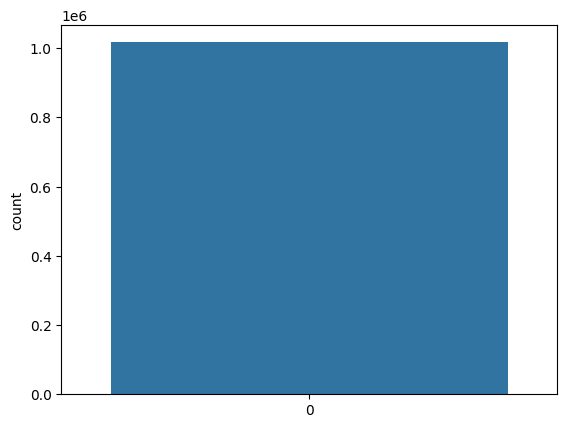

In [124]:
#count of Promo2
sns.countplot(df['Promo2'])

Use:Bar chart present data in a visual form so that the reader may readily recognize patterns

Insight:There are 2 type of 0 and 1 where 0 indicates stores are running long time promo or not so there us almost same count for both the category
the count are for 1-509178 & for 0-508031 

<Axes: ylabel='count'>

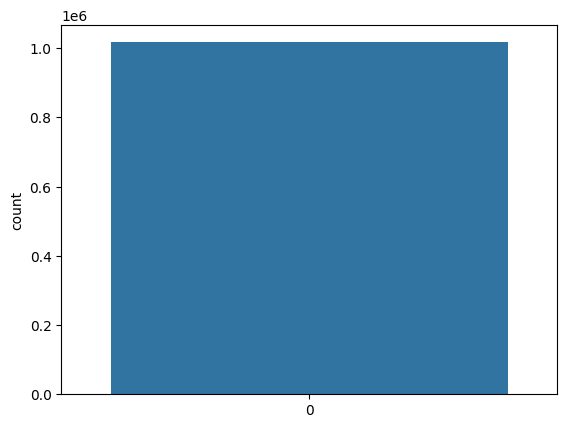

In [125]:
# count of stateholiday
sns.countplot(df['StateHoliday'])

Use:Bar-Chart present data in a visual form so that the reader may readily recognize patterns

Insight:We can say that highest count is for 0 i.e store is close on state holiday

<Axes: ylabel='count'>

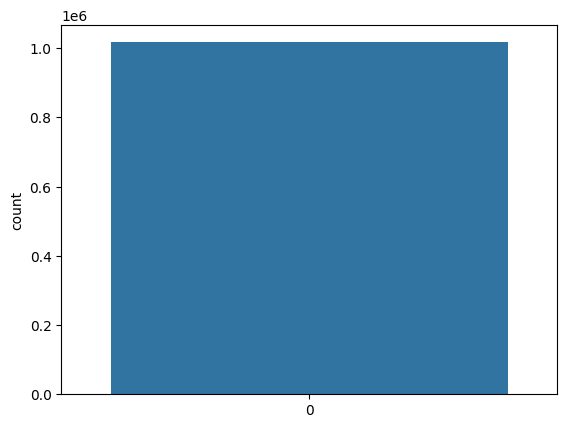

In [126]:
#count for Promo
sns.countplot(df['Promo'])

Use:Bar chart-present data in a visual form so that the reader may readily recognize patterns

Insight:Promo - indicates whethere a store is running a promo on that day 0 is for No 1 is for Yes
As per observation Store is not Running much on a day because 0 have higher value as compare to 1

<Axes: ylabel='count'>

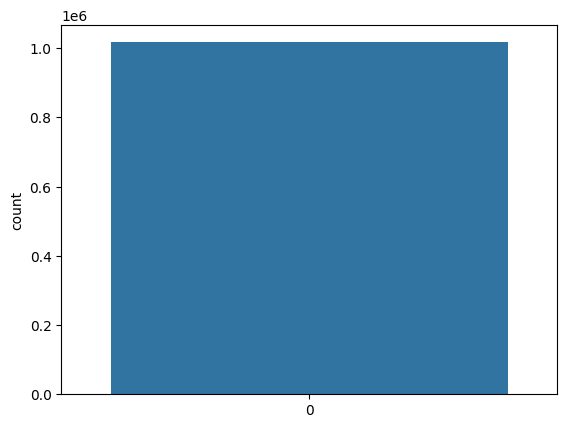

In [127]:
#count of SchoolHoliday
sns.countplot(df['SchoolHoliday'])

Use:Bar chart-present data in a visual form so that the reader may readily recognize patterns

Insigth:From this Observation we can say that most of the Store are Closed on School Holiday

# **Bivariant charts**

# Distribution of assortment Type And its Sales

Text(0.5, 1.0, 'Boxplot for the effect of Assortment Type on sales')

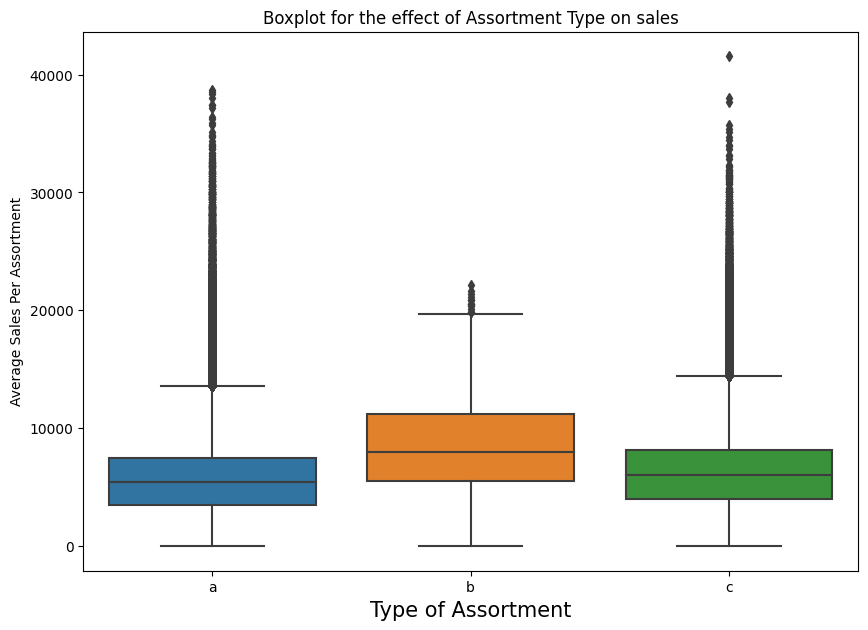

In [128]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Assortment",y="Sales",data=df)
plt.xlabel("Type of Assortment",size=15)
plt.ylabel("Average Sales Per Assortment")
plt.title("Boxplot for the effect of Assortment Type on sales")

Use:BoxPlot and whisker plots, are a great chart to use when showing the distribution of data points across a selected measure

Insight:We can observe that Assortment b have more no. of sales then other 2

# What is the Sales Corresponds to Years?





<Axes: title={'center': 'Sales With Respect To Year'}, ylabel='Avg Sales'>

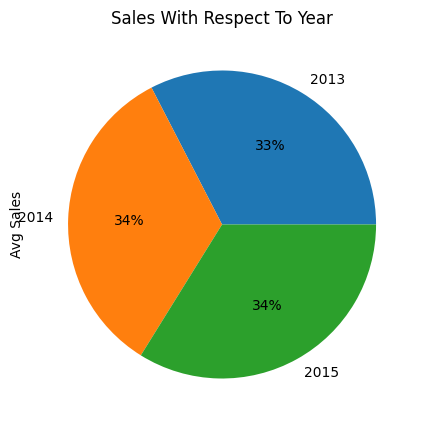

In [129]:
#Sales As per Years
dfg = df.groupby(['Year'])['Sales'].mean()
dfg.plot(kind='pie', title='Sales With Respect To Year', ylabel='Avg Sales',
xlabel='Year', figsize=(6, 5), autopct='%.0f%%')

Chart:Pie chart show percentages of a whole, and represents percentages at a set point in time.

Insights:As Per the Graph Maximum Sales occure in 2015  & 2014

Impact:We can Say that total sales % is almost same for 2014-15 and just 1% sale is decreseas in 2013 , It shows positive impact on Business that Sales is increasing or beign constant over a year there is not much loss

# Promotion w.r.t Sales

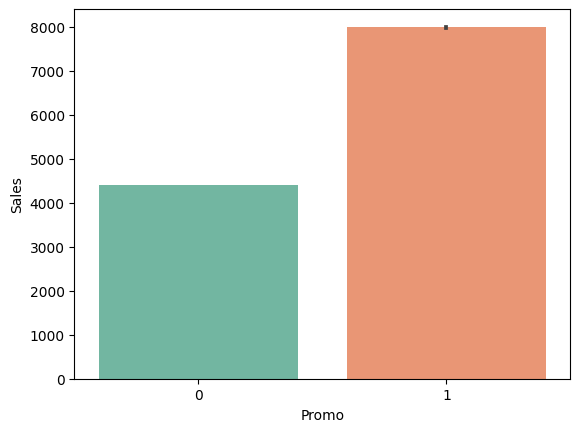

In [130]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=df, palette="Set2")

Use:Bar chart-present data in a visual form so that the reader may readily recognize patterns

Insight: Those store who took promotions their sales are high as compared to stores who didnt took promotion.

Impact:We can say that to make profit stores should take promo for betterment


# Distributuin of Sale w.r.t Store Type

Text(0.5, 1.0, 'Boxplot For Sales Values with respect to Store Type')

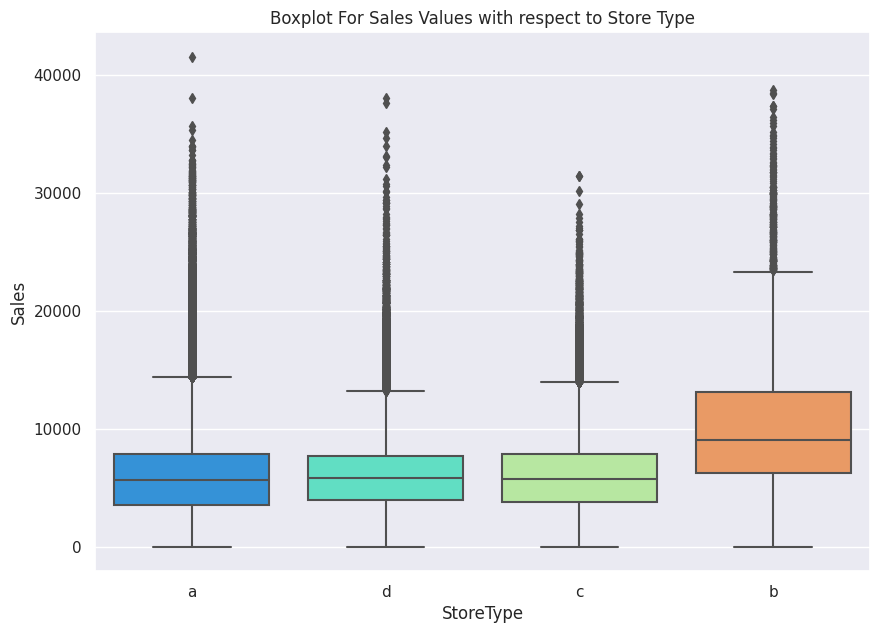

In [131]:
#Average Sales Per Store
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="StoreType", y="Sales", data=df,palette='rainbow')
plt.title('Boxplot For Sales Values with respect to Store Type')

Chart:Box and whisker plots, are a great chart to use when showing the distribution of data points across a selected measure

Insight:We can see that Store type 'b' have higher sales among the all 

# **Multivariant charts**

# Impact of School Holiday on Sales

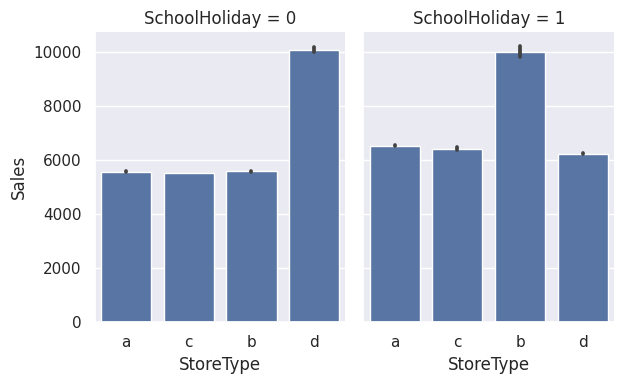

In [132]:
g = sns.FacetGrid(df, col="SchoolHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

Chart:Bar chart-present data in a visual form so that the reader may readily recognize patterns

Insight:We can say that Storetype 'd' have more Sale when Schools are closed and when School are open it have less sales as compared on holiday
And vise versa for store type'b', type c & d doesn't effect much like 'b' and 'c'

Impact : For Profitable Business We can have more Sales when Schools are open 

# Impact of Sales w.r.t Promo , Assortments & StoreType

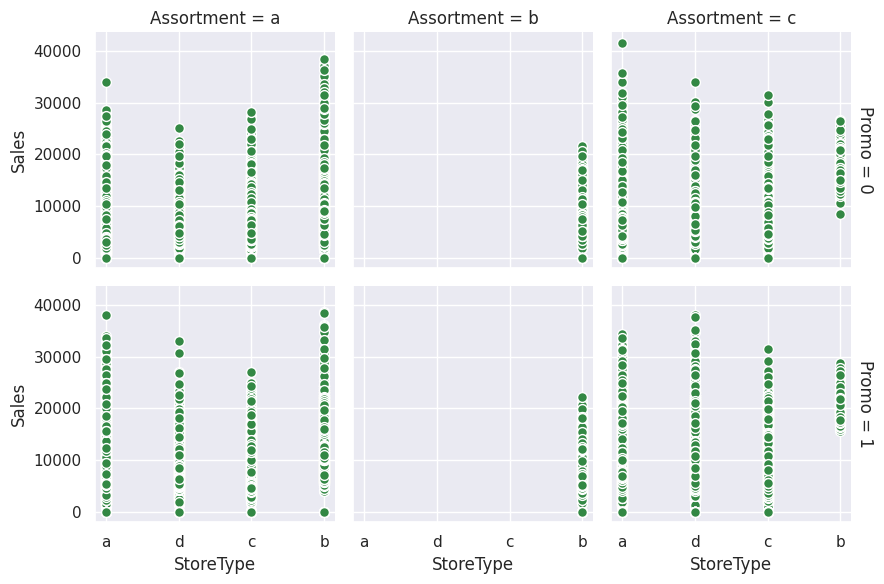

In [133]:
g = sns.FacetGrid(df, col="Assortment", row="Promo", margin_titles=True, height=3)
g.map(plt.scatter,  "StoreType","Sales", color="#338844", edgecolor="white", s=50, lw=1)
# g.set(xlim=(0, 50), ylim=(0, 100));

Use :FacetGrid Chart helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

Insights:
**ASSORTMENT "A"**:We can observe that Store type 'a' have more Sales then they apply promo and with basic assortment i.e 'a'

Same for Store type 'b' & 'c'

Store type 'd' have almost same sales with or without promo of assorment type 'a'

**ASSORTMENT "B"**:On assortment type 'b' i.e entented it have sales only for Store 'a' and that too same sales with or without promo

**ASSORTMENT "C"**:We can observes that Store 'a','b' & 'd' have more sales without promo
and 'c' have same sales with or without

Impact:We can have more sales with promo on basic assortment ,on extended type we have highers sales when one day promo is not applied and we dnt have any benifit for extra  type i.e assortment 'b'

# Impact on Sales w.r.t StateHoliday

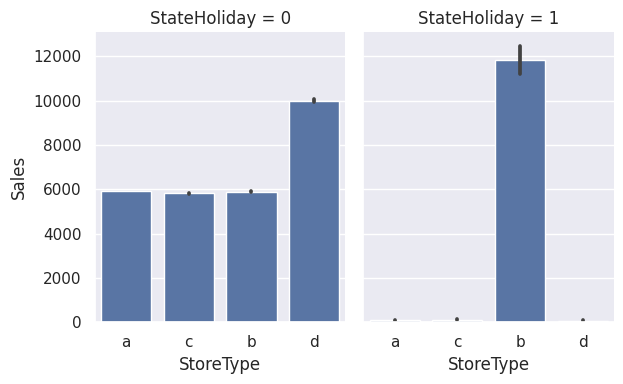

In [134]:
g = sns.FacetGrid(df, col="StateHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

Chart:Bar chart present data in a visual form so that the reader may readily recognize patterns

Insight:We Can Say that on StateHoliday Most Stores have less Sales ,In the above Graph Store 'b' Sales have higher and highest Sales among the all and its self w.r.t Not StateHoliday

Impact: Stateholiday play negative roles on sales

# Week wise Sales on the basis of Assortment and Promotions

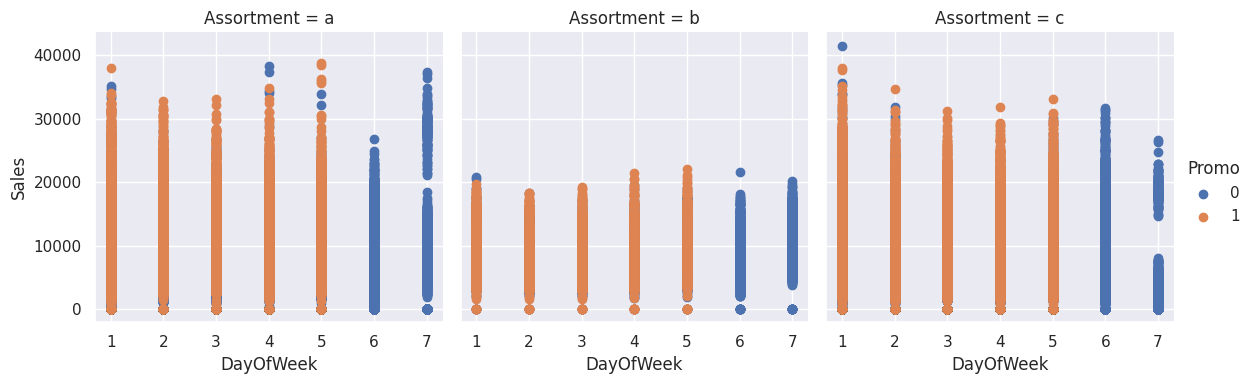

In [135]:
g = sns.FacetGrid(df, hue="Promo", col="Assortment", height=4)
g.map(plt.scatter,"DayOfWeek","Sales")
g.add_legend();

Chart:FacetGrid Charts in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

Insights:As we done before Same insight but on Store type now will do on Week Day here 1 means Monday and 7 means Sunday 

As per graph Assortment=a have more say on monday ,thursday,friday and sunday 
when we apply promo on monday we have more sale then without promo same for Friday and We Sales on Thurday,Saturday and Sunday without promo applied 

Same for Assortment b and c

Impact :As compared to 3 of assortment we have more sales on assortment type 'a'then 'c' and lastly 'b'

**Long term Promotion w.r.t Week of Store type and its Sales**

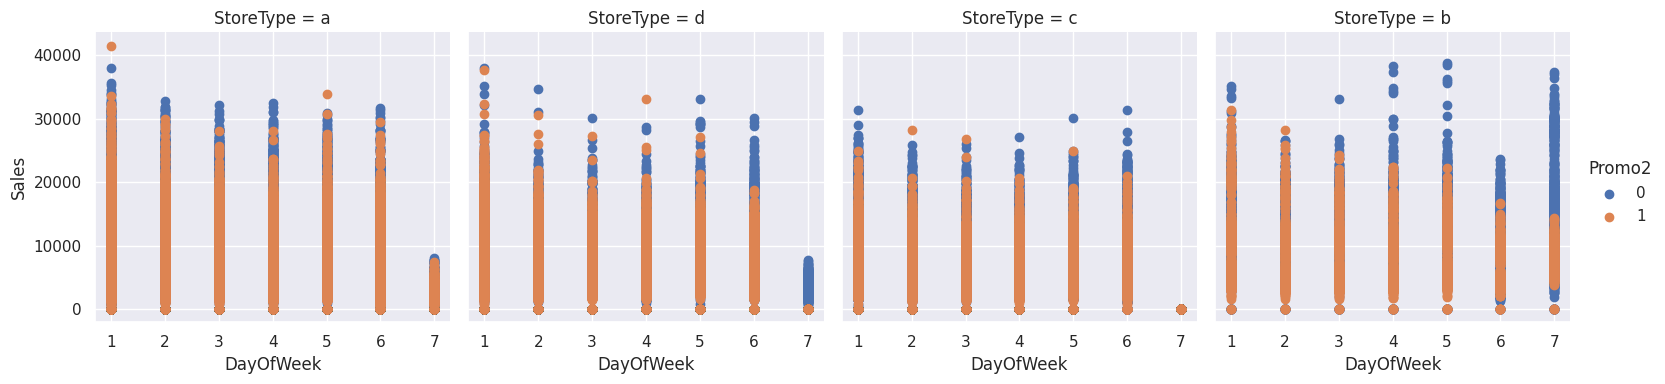

In [136]:
g = sns.FacetGrid(df, hue="Promo2", col="StoreType", height=4)
g.map(plt.scatter,"DayOfWeek","Sales")
g.add_legend();

Chart:FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

Insight:Store type 'a' have more Sales on Monday then b,c & d with Long Promo applied 

Store 'b' have more Sales on Thursday & Friday then a,c,d Without Promo2

Store 'c' have more sales on Monday and Saturday without Promo2

Store 'd have more Sales on Monday without Promo2

Impact:there is Very much Less Sales on Sunday As compared to other Days


# Which day of the week has maximum sales and Customers?

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

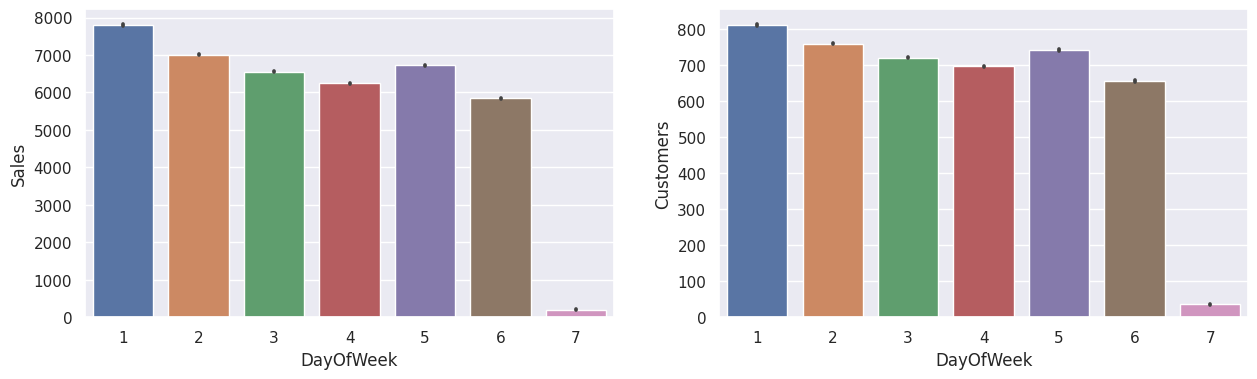

In [137]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df, order=[1,2,3,4,5,6,7], ax=axis2)

Chart:Bar chart-present data in a visual form so that the reader may readily recognize patterns

Insight: Sales is highest on Monday And Customer though And Vise versa on Sunday as its weekend 

# Correlation Matrixs

In [138]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

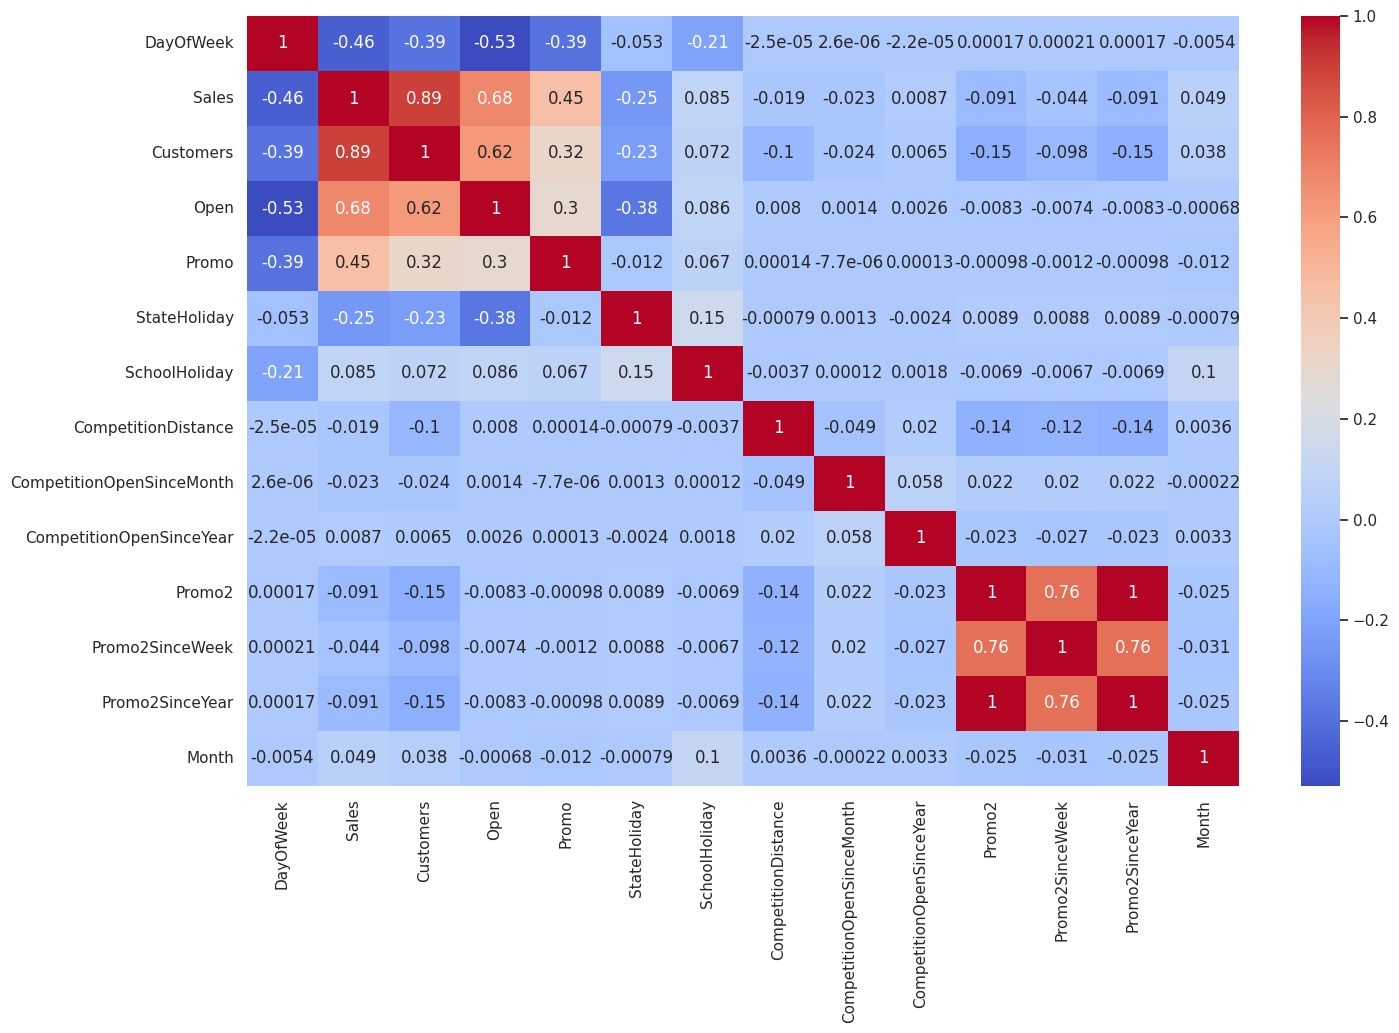

In [139]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

#### Chart - 2

In [140]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [141]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [142]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [143]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [144]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [145]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [146]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [147]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [148]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [149]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [150]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [151]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [152]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [153]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [154]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [156]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [157]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [158]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [159]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [160]:
# Expand Contraction

#### 2. Lower Casing

In [161]:
# Lower Casing

#### 3. Removing Punctuations

In [162]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [163]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [164]:
# Remove Stopwords

In [165]:
# Remove White spaces

#### 6. Rephrase Text

In [166]:
# Rephrase Text

#### 7. Tokenization

In [167]:
# Tokenization

#### 8. Text Normalization

In [168]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [169]:
# POS Taging

#### 10. Text Vectorization

In [170]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [171]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [172]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [173]:
# Transform Your data

### 6. Data Scaling

In [174]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [175]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [176]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [177]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [178]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [179]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [180]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [181]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [182]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [183]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [184]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [185]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [186]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [187]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***